<h1 align='center'>Kaggle :House Prices</h1>

### The dataset depicts the 79 explanatory variables describing every aspect of residential homes in Ames, Iowa. The goal of the project is to find the final price of each house.

### Objective of this problem is to predict the sales price for each house.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\ADITI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Let us load the datafiles 
trainData=pd.read_csv('train.csv')
testData=pd.read_csv('test.csv')

In [3]:
print(trainData.shape)
trainData.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(testData.shape)
testData.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
#Let us drop the ID Column for the timebeing as it is not much useful for the prediction.

train_id=trainData['Id']
test_id=testData['Id']

trainData.drop('Id', axis=1,inplace=True)
testData.drop('Id', axis=1,inplace=True)

In [8]:
trainData.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


### In our dataset, the dependent variable is the SalesPrice. Let us look at tht column in our training data and get to know how it is related to other variables in the dataset.

In [9]:
trainData['SalePrice'].describe().T

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

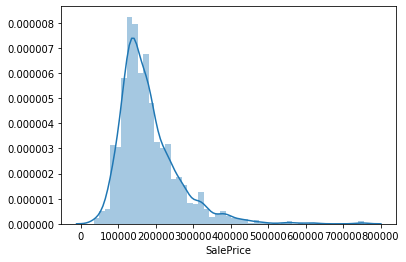

In [10]:
# Let us look at the histogram of the target variable:
sns.distplot(trainData['SalePrice'])

### Skewness: It generally measures the data, symmetry.The normal value for a symmetrical data is 0.
### Kurtosis: It measures the amount of probability in the tails. The standard value is supposed to be around 3 for a normal distributuion. Hoever, here the value is much higher.

### From the above analysis, it is clear that the target variable is not in the correct distribution and hence, we need to perform a log transformation in order to bring it to a normalized form. 

In [11]:
print("Skewness: %f" % trainData['SalePrice'].skew())
print("Kurtosis: %f" % trainData['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness: 0.121335
Kurtosis: 0.809532


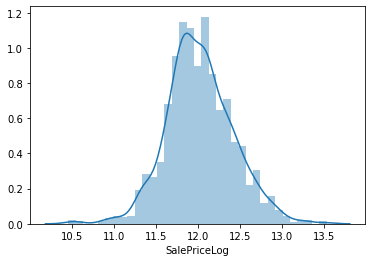

In [12]:
# Applying the log transaformation, we get
trainData['SalePriceLog']= np.log(trainData['SalePrice'])
sns.distplot(trainData['SalePriceLog'])
print("Skewness: %f" % trainData['SalePriceLog'].skew())
print("Kurtosis: %f" % trainData['SalePriceLog'].kurt())

In [13]:
trainData.drop('SalePrice', axis= 1, inplace=True)
target = 'SalePriceLog'

### This is much better looking histogram as compared to the histogram before the Log Transformation.
### Let us check the skewness of the data using the QQ- Plot.

### The QQ-Plot (Quantile-Quantile Plot) helps in visualizing whther the data is normally distributed or not.

Reference: https://data.library.virginia.edu/understanding-q-q-plots/

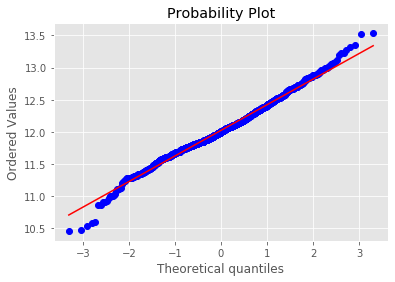

In [14]:
plt.style.use('ggplot')
qqplot=plt.figure()

res=stats.probplot(trainData[target],plot=plt)
plt.show()

### Correlation Matrix

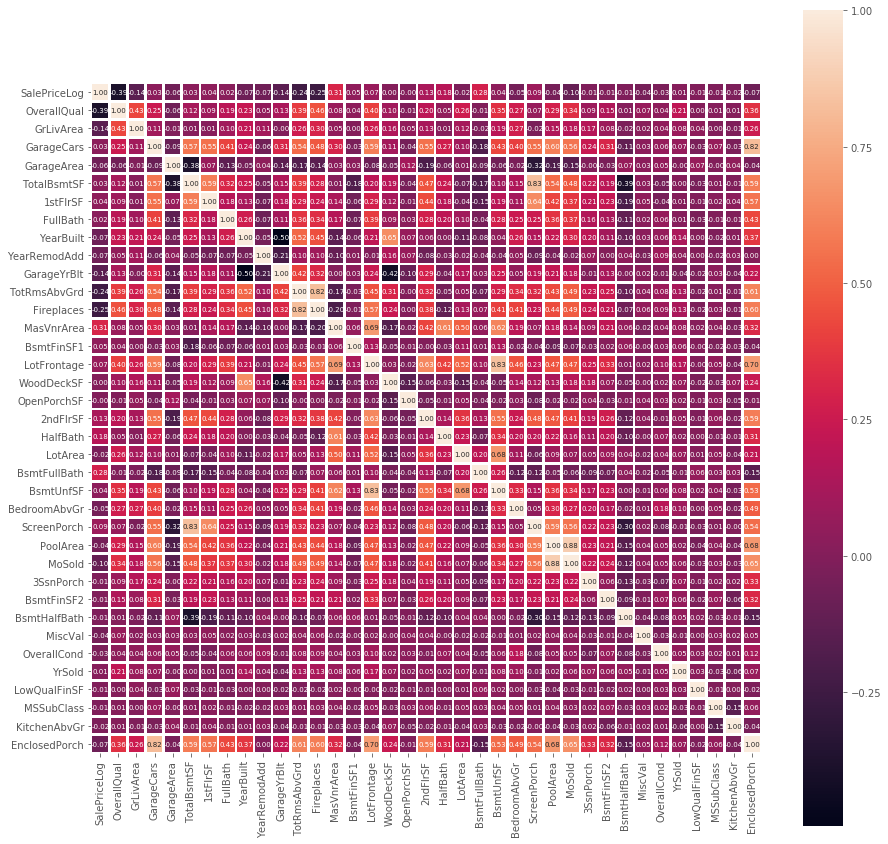

In [15]:
# The corelation matrix depicts the correlation coeficients between the different variables in the dataset. 

plt.subplots(figsize=(15,15))

trainCol=len(trainData.columns)

corr =trainData.corr()

cols = corr.nlargest(trainCol, target)[target].index

sns.heatmap(corr, linewidths=1.5, annot=True, square=True, 
              fmt='.2f', annot_kws={'size': 7}, 
                yticklabels=cols.values, xticklabels=cols.values)

plt.show()
    

In [16]:
#Printing the columns and their correlations
corr_abs = corr.abs()
colLen = len(trainData)
cols = corr.nlargest(colLen, target)[target]
print (cols)

SalePriceLog     1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePriceLog, dtype: float64


In [17]:
# We are dropping features with negatuve correlation from train and test dataset.

trainData.drop('BsmtHalfBath', axis= 1, inplace=True)
trainData.drop('MiscVal', axis= 1, inplace=True)
trainData.drop('OverallCond', axis= 1, inplace=True)
trainData.drop('YrSold', axis= 1, inplace=True)
trainData.drop('LowQualFinSF', axis= 1, inplace=True)
trainData.drop('MSSubClass', axis= 1, inplace=True)
trainData.drop('KitchenAbvGr', axis= 1, inplace=True)
trainData.drop('EnclosedPorch', axis= 1, inplace=True)

In [18]:
testData.drop('BsmtHalfBath', axis= 1, inplace=True)
testData.drop('MiscVal', axis= 1, inplace=True)
testData.drop('OverallCond', axis= 1, inplace=True)
testData.drop('YrSold', axis= 1, inplace=True)
testData.drop('LowQualFinSF', axis= 1, inplace=True)
testData.drop('MSSubClass', axis= 1, inplace=True)
testData.drop('KitchenAbvGr', axis= 1, inplace=True)
testData.drop('EnclosedPorch', axis= 1, inplace=True)

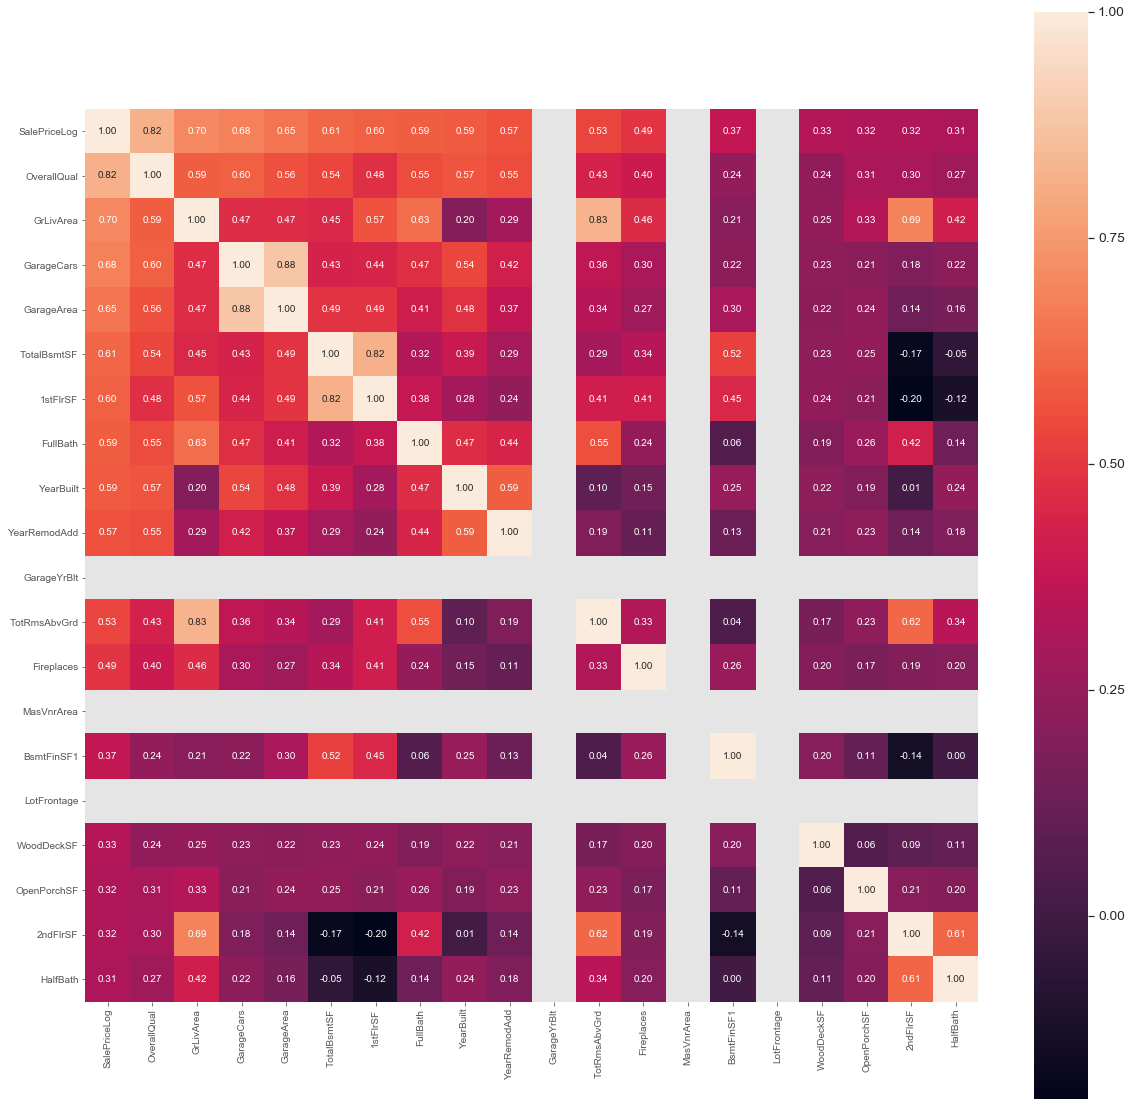

In [19]:
# The above HeatMap is abit confusing to read.Let us read the top 15 values from the above correlation matrix.
n = 20 #number of variables for heatmap
plt.subplots(figsize=(20,20))
cols = corr.nlargest(n, target)[target].index
cm = np.corrcoef(trainData[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\ADITI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


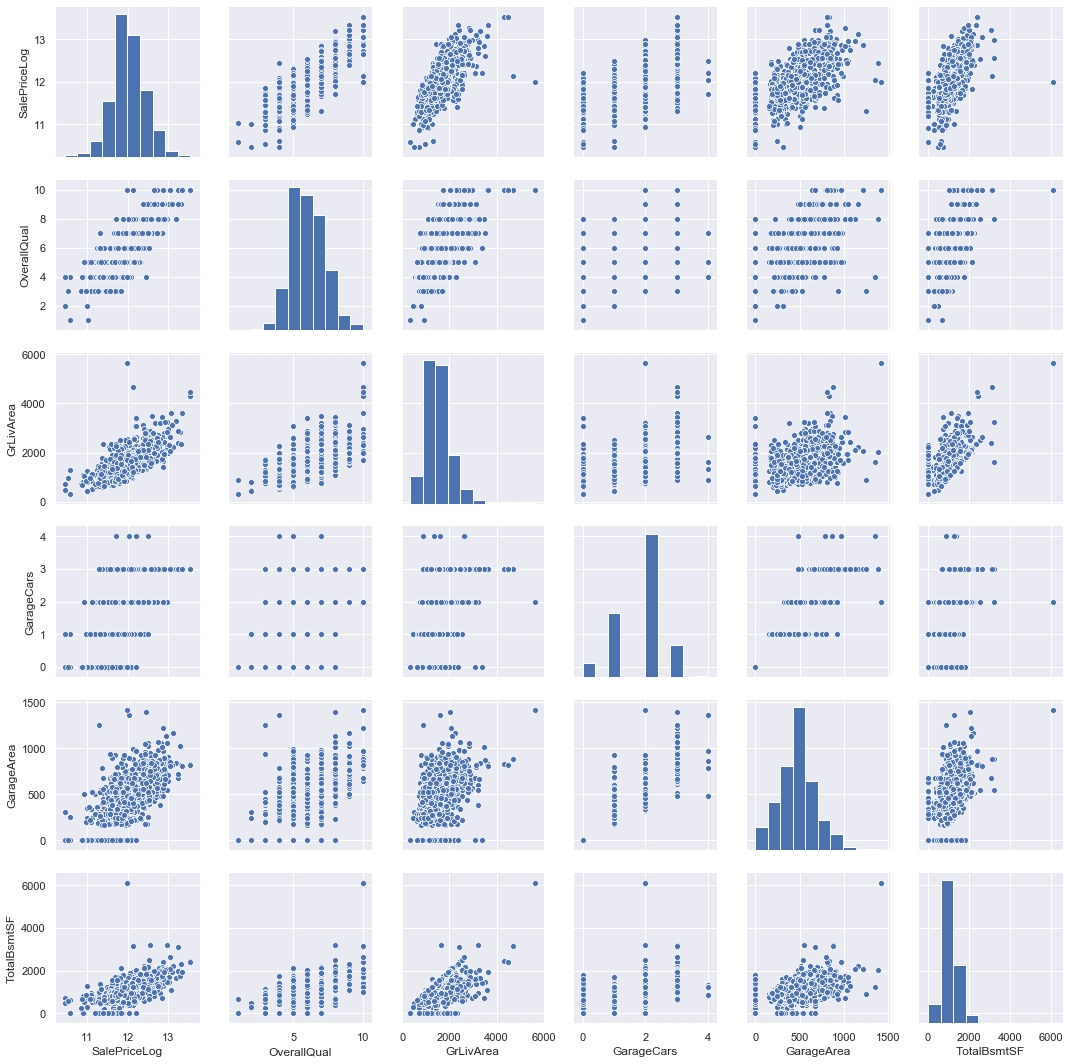

In [20]:
sns.set()
related_columns = ['SalePriceLog', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(trainData[related_columns], size = 2.5)
plt.show()

### Analysis from the above plot:

1. sales price strictly increases as Overall Quality increases.
2. Increase in Ground living area(GrLivArea) correspond to increase in price.But with few outliers.
3. For GarageArea, there are a lot of observation with 0, which means that they don't have garage. 
4. There are a few outliers in GrLivArea and GarageArea.


### Remove outliers

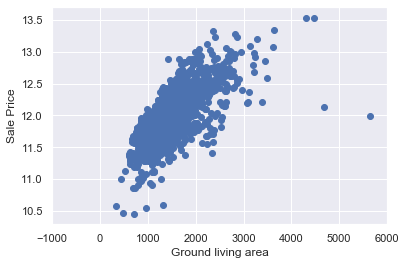

In [21]:
plt.scatter(x=trainData['GrLivArea'], y=trainData['SalePriceLog'])
plt.xlim(-1000,6000)
plt.ylabel('Sale Price')
plt.xlabel('Ground living area')
plt.show()

In [22]:
trainData = trainData[trainData['GrLivArea'] < 4500]

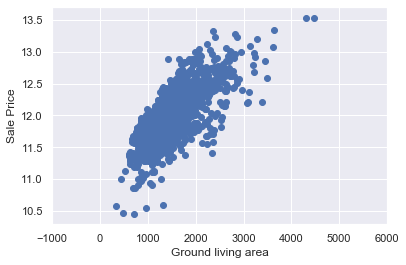

In [23]:
plt.scatter(x=trainData['GrLivArea'], y=trainData['SalePriceLog'])
plt.xlim(-1000,6000)
plt.ylabel('Sale Price')
plt.xlabel('Ground living area')
plt.show()

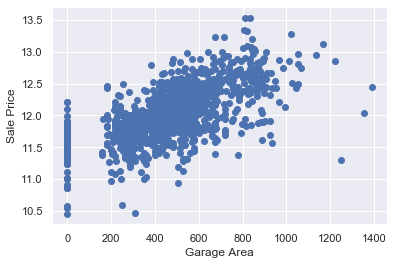

In [24]:
plt.scatter(x=trainData['GarageArea'], y=trainData['SalePriceLog'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [25]:
trainData = trainData[trainData['GarageArea'] < 1200]

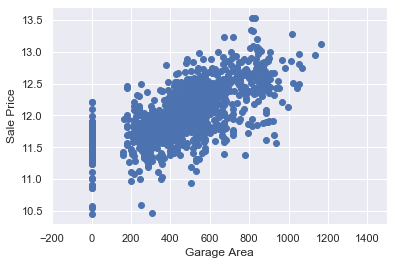

In [26]:
plt.scatter(x=trainData['GarageArea'], y=trainData['SalePriceLog'])
plt.xlim(-200,1500)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [27]:
trainData.shape

(1454, 72)

### Let us take a look at the missing data.

In [28]:
total = trainData.isnull().sum().sort_values(ascending=False)
nullCount=total.head(30)
print(nullCount)

PoolQC          1448
MiscFeature     1401
Alley           1363
Fence           1173
FireplaceQu      689
LotFrontage      258
GarageCond        81
GarageQual        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
Electrical         1
YearRemodAdd       0
ExterQual          0
ExterCond          0
Foundation         0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
SalePriceLog       0
YearBuilt          0
OverallQual        0
dtype: int64


In [29]:
total = testData.isnull().sum().sort_values(ascending=False)
nullCount=total.head(20)
print(nullCount)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
dtype: int64


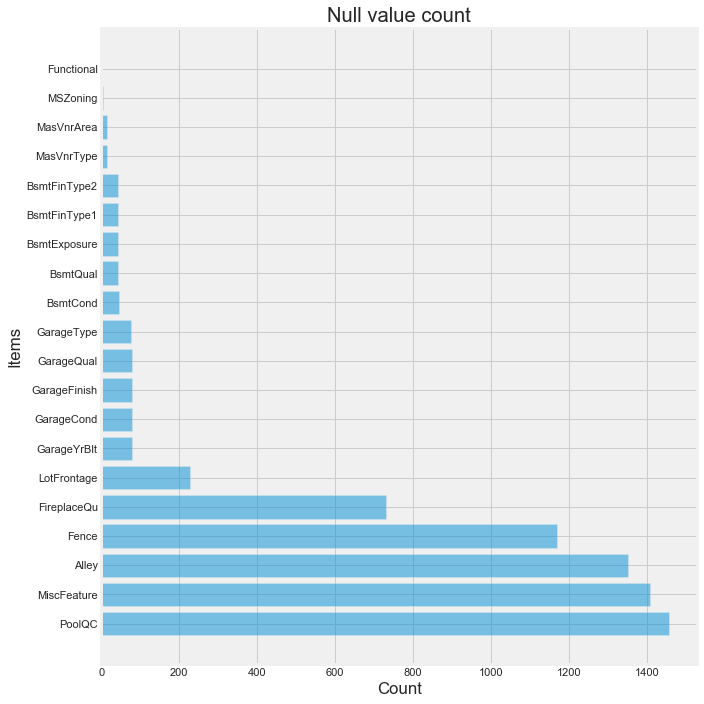

In [30]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.barh(nullCount.index, nullCount.values, align='center', alpha=0.5)
plt.xlabel('Count')
plt.ylabel('Items')
plt.title('Null value count')
plt.tight_layout()

plt.show()

### Combining train and test data together

In [31]:
X_train = trainData.loc[:, trainData.columns != 'SalePriceLog']
y_train = trainData['SalePriceLog']

data = pd.concat((X_train, testData)).reset_index(drop=True)
#data.drop(['SalePriceLog'], axis=1, inplace=True)         #Drop the Sale price Log column
print("datasize is : {}".format(data.shape))

datasize is : (2913, 71)


In [32]:
data.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,NaN,NaN,NaN,2,WD,Normal
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,NaN,NaN,5,WD,Normal
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,NaN,NaN,NaN,9,WD,Normal
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,35,0,0,0,NaN,NaN,NaN,2,WD,Abnorml
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,NaN,NaN,NaN,12,WD,Normal


### Impute the missing values

In [33]:
#The PoolQC has the most number of missing data.Here Nan means, 'no-pool'. We can fill the NaN values with 'none'.
data["PoolQC"] = data["PoolQC"].fillna("None")


#Similary, for the following features 'Nan' means no value.

data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data['GarageType'] =data['GarageType'].fillna("None")
data['GarageFinish'] = data['GarageFinish'].fillna("None")
data['GarageQual'] = data['GarageQual'].fillna("None")
data['GarageCond'] = data['GarageCond'].fillna("None")


# The  categorical parameters that define the basement have to be replaced by 'none' 
data['BsmtQual'] = data['BsmtQual'].fillna("None")
data['BsmtCond'] = data['BsmtCond'].fillna("None")
data['BsmtExposure'] = data['BsmtExposure'].fillna("None")
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("None")
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("None")


#The variables describing the Masonary Area
data["MasVnrType"] = data["MasVnrType"].fillna("None")


# Let us look at the parameters which define the garage in the houses
#if there is no garrage, there are no cars
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)
data['GarageCars'] = data['GarageCars'].fillna(0)


#The variables describing the basement can be considered 0, if there is no basement.
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
#data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)

#The variable describing the Masonary Area
data["MasVnrArea"] =data["MasVnrArea"].fillna(0)


#The Elecrical Parameter has only one, missing value. Hence, we can fill it up with the most appeard value i.e Mode
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

#The LotFrontage variable can be imputed by grouping the Neighbourhood variable with the median value of the Lot.
#It can safely be assumed that, the houses in the similar neighbouhood may have similar Lot sizes.

data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


# Replacing MSZONING with the most common value
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])


#Replacing the null values of 'Functional' with 'Typical'
data["Functional"] = data["Functional"].fillna("Typical")


data['Utilities'] = data['Utilities'].fillna("AllPub")

#replacing the null values with the most occured value
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

#Both the following features can be replaced by mode

data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

In [34]:
total= data.isnull().sum().sort_values(ascending=False)
print(total)

SaleCondition    0
ExterCond        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
MSZoning         0
Length: 71, dtype: int64


In [35]:
data.shape

(2913, 71)

In [36]:
numCount = data.dtypes[data.dtypes != "object"].index
print("Numerical data count: ", len(numCount))

catCount = data.dtypes[data.dtypes == "object"].index
print("Categorical data count: ", len(catCount))

Numerical data count:  28
Categorical data count:  43


In [37]:
numCount = data.dtypes[data.dtypes != "object"].index
print("Numerical data columns: ", numCount)

Numerical data columns:  Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold'],
      dtype='object')


### Scaling of data

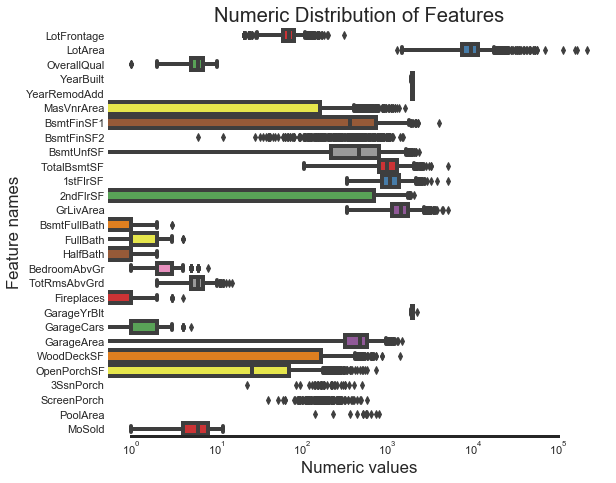

In [38]:

sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numCount] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [39]:
from sklearn.preprocessing import RobustScaler

In [40]:
scaled_features = data.copy()
col_names = list(numCount)
features = scaled_features[col_names]

rs = RobustScaler()

features = rs.fit_transform(features.values)

scaled_features[col_names] = features
scaled_features.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,RL,-0.25,-0.246670,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0.500000,0.0,0.0,0.0,None,None,None,-1.00,WD,Normal
1,RL,0.50,0.037000,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,-0.371429,0.0,0.0,0.0,None,None,None,-0.25,WD,Normal
2,RL,-0.10,0.444006,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0.228571,0.0,0.0,0.0,None,None,None,0.75,WD,Normal
3,RL,-0.50,0.024667,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0.128571,0.0,0.0,0.0,None,None,None,-1.00,WD,Abnorml
4,RL,0.70,1.186482,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0.828571,0.0,0.0,0.0,None,None,None,1.50,WD,Normal


C:\Users\ADITI\Anaconda3\lib\site-packages\seaborn\categorical.py:486: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  **kws)


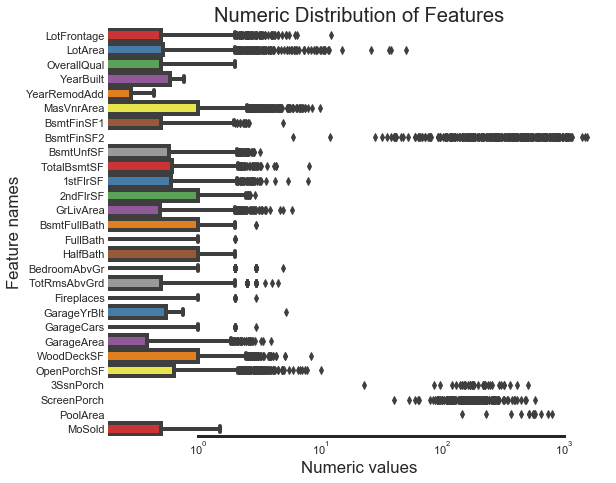

In [41]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=scaled_features[numCount] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [42]:
data = scaled_features

### Encoding categorical variable

In [43]:
catCount = data.dtypes[data.dtypes == "object"].index
print("Categorical data count: ", len(catCount))

Categorical data count:  43


In [44]:
catCount=list(catCount)

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [46]:
data=pd.get_dummies(data,prefix=['MSZoning'],columns=['MSZoning'], drop_first = True)
data=pd.get_dummies(data,prefix=['Street'],columns=['Street'], drop_first = True)
data=pd.get_dummies(data,prefix=['Alley'],columns=['Alley'], drop_first = True)
data=pd.get_dummies(data,prefix=['LandContour'],columns=['LandContour'], drop_first = True)
data=pd.get_dummies(data,prefix=['LotConfig'],columns=['LotConfig'], drop_first = True)
#data=pd.get_dummies(data,prefix=['LandSlope'],columns=['LandSlope'])
data=pd.get_dummies(data,prefix=['Neighborhood'],columns=['Neighborhood'], drop_first = True)
data=pd.get_dummies(data,prefix=['Condition1'],columns=['Condition1'], drop_first = True)
data=pd.get_dummies(data,prefix=['Condition2'],columns=['Condition2'], drop_first = True)
data=pd.get_dummies(data,prefix=['BldgType'],columns=['BldgType'], drop_first = True,)
data=pd.get_dummies(data,prefix=['HouseStyle'],columns=['HouseStyle'], drop_first = True)
data=pd.get_dummies(data,prefix=['RoofStyle'],columns=['RoofStyle'], drop_first = True)
data=pd.get_dummies(data,prefix=['RoofMatl'],columns=['RoofMatl'], drop_first = True)
data=pd.get_dummies(data,prefix=['Exterior1st'],columns=['Exterior1st'], drop_first = True)
data=pd.get_dummies(data,prefix=['Exterior2nd'],columns=['Exterior2nd'], drop_first = True)
data=pd.get_dummies(data,prefix=['MasVnrType'],columns=['MasVnrType'], drop_first = True)
data=pd.get_dummies(data,prefix=['Foundation'],columns=['Foundation'], drop_first = True)
data=pd.get_dummies(data,prefix=['Heating'],columns=['Heating'], drop_first = True)
data=pd.get_dummies(data,prefix=['CentralAir'],columns=['CentralAir'], drop_first = True)
data=pd.get_dummies(data,prefix=['Electrical'],columns=['Electrical'], drop_first = True)
data=pd.get_dummies(data,prefix=['Functional'],columns=['Functional'], drop_first = True)
data=pd.get_dummies(data,prefix=['GarageType'],columns=['GarageType'], drop_first = True)
data=pd.get_dummies(data,prefix=['PavedDrive'],columns=['PavedDrive'], drop_first = True)
data=pd.get_dummies(data,prefix=['Fence'],columns=['Fence'], drop_first = True)
data=pd.get_dummies(data,prefix=['MiscFeature'],columns=['MiscFeature'], drop_first = True)
data=pd.get_dummies(data,prefix=['SaleType'],columns=['SaleType'], drop_first = True)
data=pd.get_dummies(data,prefix=['SaleCondition'],columns=['SaleCondition'], drop_first = True)
data=pd.get_dummies(data,prefix=['Utilities'],columns=['Utilities'], drop_first = True)




In [47]:
data.shape

(2913, 203)

In [48]:
dictionary={'Reg':1,'IR1':2,'IR2':3,'IR3':4}
data['LotShape']=data['LotShape'].map(dictionary)
print(data.LotShape.unique())

dictionary1={'Gtl':1,'Mod':2,'Sev':3}
data['LandSlope']=data['LandSlope'].map(dictionary1)
print(data.LandSlope.unique())


dictionary2={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5}
data['ExterQual']=data['ExterQual'].map(dictionary2)
print(data.ExterQual.unique())

dictionary3={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5}
data['ExterCond']=data['ExterCond'].map(dictionary3)
print(data.ExterCond.unique())



dictionary4={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'None':6}
data['BsmtQual']=data['BsmtQual'].map(dictionary4)
print(data.BsmtQual.unique())


dictionary5={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'None':6}
data['BsmtCond']=data['BsmtCond'].map(dictionary5)
print(data.BsmtCond.unique())

dictionary6={'Gd':1,'Av':2,'Mn':3,'No':4,'None':5}
data['BsmtExposure']=data['BsmtExposure'].map(dictionary6)
print(data.BsmtExposure.unique())


dictionary7={'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'None':7}
data['BsmtFinType1']=data['BsmtFinType1'].map(dictionary7)
print(data.BsmtFinType1.unique())


dictionary8={'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'None':7}
data['BsmtFinType2']=data['BsmtFinType2'].map(dictionary8)
print(data.BsmtFinType2.unique())

dictionary9={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5}
data['HeatingQC']=data['HeatingQC'].map(dictionary9)
print(data.HeatingQC.unique())


dictionary10={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5}
data['KitchenQual']=data['KitchenQual'].map(dictionary10)

dictionary11={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'None':6}
data['FireplaceQu']=data['FireplaceQu'].map(dictionary11)

dictionary12={'Fin':1,'RFn':2,'Unf':3,'None':4}
data['GarageFinish']=data['GarageFinish'].map(dictionary12)

dictionary13={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'None':6}
data['GarageQual']=data['GarageQual'].map(dictionary13)

dictionary14={'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'None':6}
data['GarageCond']=data['GarageCond'].map(dictionary14)

dictionary15={'Ex':1,'Gd':2,'TA':3,'Fa':4,'None':5}
data['PoolQC']=data['PoolQC'].map(dictionary15)


[1 2 3 4]
[1 2 3]
[2 3 1 4]
[3 2 4 5 1]
[2 3 1 6 4]
[3 2 6 4 5]
[4 1 3 2 5]
[1 2 6 4 3 7 5]
[6 3 7 2 4 5 1]
[1 2 3 4 5]


In [49]:
data.shape

(2913, 203)

In [50]:
total= data.isnull().sum().sort_values(ascending=False)
print(total)

Utilities_NoSeWa        0
Neighborhood_Crawfor    0
Neighborhood_NridgHt    0
Neighborhood_NoRidge    0
Neighborhood_NWAmes     0
                       ..
Exterior1st_WdShing     0
Exterior1st_Wd Sdng     0
Exterior1st_VinylSd     0
Exterior1st_Stucco      0
LotFrontage             0
Length: 203, dtype: int64


### Split data to train and test again

In [51]:
trainData=data.iloc[:1454,:]
testData=data.iloc[1454:,:]

In [52]:
trainData.shape

(1454, 203)

In [53]:
testData.shape

(1459, 203)

In [54]:
X_train = trainData

### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

def algorithm_pipeline(X_train_data, y_train_data,model, param_grid, n_iter=50,cv=8, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid, 
        cv=cv, 
        n_iter=n_iter,
        n_jobs=7, 
        scoring=scoring_fit,
        verbose=5,
        return_train_score=True,
        random_state=5
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    return fitted_model, gs


### Model 1: XGBOOST

In [58]:
# import sys
# !{sys.executable} -m pip install xgboost
import xgboost
from sklearn.decomposition import PCA
regressor=xgboost.XGBRegressor()

# Let us evaluate the parameters:
n_estimators=[100,300,500,900,1100,1300]
max_depth=[2,4,5,10,13]
learning_rate=[0.05,0.15,0.25,0.20]
min_child_weight=[1,2,3,4]
booster=['gbtree','gblinear']
base_score=[0.30,0.5,0.70,1]

# Defining the grid for Hyperparameters

grid={'n_estimators':n_estimators,'max_depth':max_depth,'learning_rate':learning_rate,'min_child_weight':min_child_weight,'booster':booster,'base_score':base_score}



xgBoost_fitted_model, xgBoost_gridCV = algorithm_pipeline(X_train_data=X_train, y_train_data=y_train,model=regressor,param_grid=grid)

Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   44.0s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:  6.2min
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed: 12.8min
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed: 22.4min
[Parallel(n_jobs=7)]: Done 400 out of 400 | elapsed: 32.3min finished


[16:30:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1]:
print(xgBoost_fitted_model)
print(np.sqrt(-xgBoost_fitted_model.best_score_))
print(xgBoost_fitted_model.best_params_)

NameError: name 'xgBoost_fitted_model' is not defined

### Model 2 : Ridge using GridSearch

In [56]:
from sklearn.linear_model import Ridge
#from sklearn.model_selection import GridSearchCV
ridge_reg = Ridge(random_state=42)
parameters = {"alpha": [1, 10, 100, 290, 500],
              "fit_intercept": [True, False],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg'], 
             }
grid = parameters

Ridge_fitted_model, Ridge_gridCV = algorithm_pipeline(X_train_data=X_train, y_train_data=y_train,model=ridge_reg,param_grid=grid)

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 8 folds for each of 40 candidates, totalling 320 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    7.0s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:    9.4s
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:   12.6s
[Parallel(n_jobs=7)]: Done 320 out of 320 | elapsed:   13.7s finished


In [57]:
print(Ridge_fitted_model)
print(np.sqrt(-Ridge_fitted_model.best_score_))

RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=42, solver='auto', tol=0.001),
                   iid='deprecated', n_iter=50, n_jobs=7,
                   param_distributions={'alpha': [1, 10, 100, 290, 500],
                                        'fit_intercept': [True, False],
                                        'solver': ['svd', 'cholesky', 'lsqr',
                                                   'sparse_cg']},
                   pre_dispatch='2*n_jobs', random_state=5, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=5)
0.11986624568469138


### Model 3 :Lasso

In [61]:
from sklearn.linear_model import  Lasso


lasso_grid = Lasso(random_state=42)

parameters = {'alpha':[0.0005,0.0006,0.06,0.5,0.0001,0.01,1,2,3,4,4.4,4],
             'tol':[0.1]}

grid_search_lasso = parameters

lasso_fitted_model, lasso_gridCV =algorithm_pipeline(X_train_data=X_train, y_train_data=y_train,model=lasso_grid,param_grid=grid_search_lasso)

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 8 folds for each of 12 candidates, totalling 96 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done  83 out of  96 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=7)]: Done  96 out of  96 | elapsed:    1.5s finished


In [62]:
#RMSE CODE

print(lasso_fitted_model)
print(np.sqrt(-lasso_fitted_model.best_score_))

RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=42, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=7,
                   param_distributions={'alpha': [0.0005, 0.0006, 0.06, 0.5,
                                                  0.0001, 0.01, 1, 2, 3, 4, 4.4,
                                                  4],
                                        'tol': [0.1]},
                   pre_dispatch='2*n_jobs', random_state=5, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=5)
0.1266593486337912


### Model 4: ElasticNetRegressor

In [63]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha':[0.0005,0.0006,0.06,0.5,0.0001,0.01,1,2,3,4,4.4,4],
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

ENet_grid = ElasticNet(random_state=42)

grid_search_Elastic = parameters

elastic_fitted_model, elastic_gridCV =algorithm_pipeline(X_train_data=X_train, y_train_data=y_train,model=ENet_grid,param_grid=grid_search_Elastic)


Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 174 tasks      | elapsed:    8.0s
[Parallel(n_jobs=7)]: Done 316 tasks      | elapsed:   13.5s
[Parallel(n_jobs=7)]: Done 387 out of 400 | elapsed:   14.6s remaining:    0.4s
[Parallel(n_jobs=7)]: Done 400 out of 400 | elapsed:   14.7s finished


In [64]:
print(elastic_fitted_model)
print(np.sqrt(-elastic_fitted_model.best_score_))
print("Elastic Net Regression score: {:.4f}\n".format(np.sqrt(-elastic_fitted_model.best_score_)))


RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=42, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=7,
                   param_distributions={'alpha': [0.0005, 0.0006, 0.06, 0.5,
                                                  0.0001, 0.01, 1, 2, 3, 4, 4.4,
                                                  4],
                                        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                     0.6, 0.7, 0.8, 0.9]},
                   pre_dispatch='2*n_jobs', random_state=5, refit=True,
                   return_train

### Model 5 : RandomForestRegressor using GridSearch


In [65]:
from sklearn.ensemble import RandomForestRegressor

rfc=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}
CV_rfc = param_grid

randomForest_fitted_model, randomForest_gridCV =algorithm_pipeline(X_train_data=X_train, y_train_data=y_train,model=rfc,param_grid=CV_rfc)

Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    2.6s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:   31.3s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:  1.5min
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:  3.3min
[Parallel(n_jobs=7)]: Done 400 out of 400 | elapsed:  4.4min finished


In [66]:
print(randomForest_fitted_model)
print(np.sqrt(-randomForest_fitted_model.best_score_))
print("Random Forest Regressor score: {:.4f}\n".format(np.sqrt(-randomForest_fitted_model.best_score_)))


RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

### Submission file download

In [ ]:

y_pred=elastic_fitted_model.predict(testData)

y_pred = np.exp(y_pred)

predictedscores=pd.DataFrame(y_pred)
data2=pd.read_csv('sample_submission.csv')
submission=pd.concat([data2['Id'],predictedscores],axis=1)
submission.columns=['Id','SalePrice']
submission.to_csv('sample_submission.csv',index=False)




### Results

### RMSE Scores from kaggle submission:

| xgboost | ridge | lasso | elasticnet | randomforest |
| :-: | :-: | :-: | :-: | :-: | 
| 0.13369 | 0.13765 | 0.14367 | 0.13772 | 0.15070 |

### Conclusion:
On the basis of above results, It is obsereved that XGBOOST model performed better than all other models. 

### Kaggle Rank:

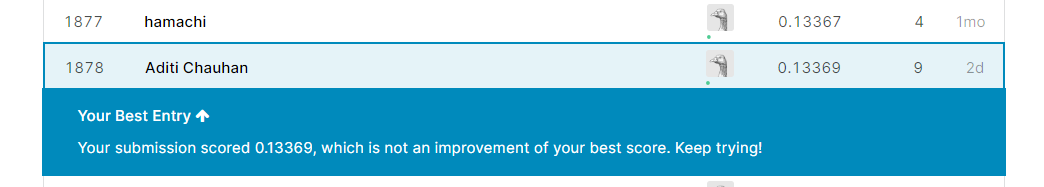

### Future Scope:
1. We will do more preprocessing on outliers.
2. Since there are columns with date and year, we can use time series analysis to predict our target values.

